In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, GeoSeries
from geopandas.tools import sjoin
import pysal
%matplotlib inline

In [2]:
# Load in data across all years, rough analysis
suspensions_df = pd.read_csv("suspension_data/cps_suspension_homeroom.csv")
suspensions_df[:10]

,Unnamed: 0,School Year,School ID,School Name,Homeroom,Count of Suspension Events,Dummy Room number to remove names,Original Homeroom
0,0,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A101,*,NaN,A101
1,1,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A102,*,NaN,A102
2,2,2010-2011,400022,CHGO ARTS CONTR HS,A103,*,NaN,A103
3,3,2010-2011,400040,FRAZIER CONTR,A104,*,NaN,A104
4,4,2010-2011,400043,HOPE CONTR ES,A110,*,NaN,A110
5,5,2010-2011,400068,PLATO CONTR,A201,*,NaN,A201
6,6,2010-2011,400091,CHGO ADV CONTR HS,A202,*,NaN,A202
7,7,2010-2011,400095,GARFIELD PARK CONTR,A203,*,NaN,A203
8,8,2010-2011,400095,GARFIELD PARK CONTR,A210,*,NaN,A210
9,9,2010-2011,400095,GARFIELD PARK CONTR,A301,*,NaN,A301


In [3]:
suspensions_df["Count of Suspension Events"] = pd.to_numeric(suspensions_df["Count of Suspension Events"], errors='coerce')
suspensions_df["Count of Suspension Events"].fillna(0, inplace=True)
suspensions_df["Count of Suspension Events"].sort_values(ascending=False)[:10]

32507    3425.0
32506    2892.0
32505    2310.0
32504    2219.0
32503    1614.0
32502    1526.0
32501    1483.0
32500    1402.0
32499    1387.0
32498    1346.0
Name: Count of Suspension Events, dtype: float64

In [4]:
# Only joining to 2014-2015 school year race data, rough initial exploration
cps_race_data = pd.read_csv("race_data/cps_race_data_1415.csv")
cps_race_data.dtypes

Network                         object
School ID                        int64
Education Units                 object
Total                           object
White No                        object
White Pct                      float64
African American No             object
African American Pct           float64
Asian/Pac Islander No            int64
Asian/Pac Islander Pct         float64
Native American/Alaskan No       int64
Native American/Alaskan Pct    float64
Hispanic No                     object
Hispanic Pct                   float64
Multi-Racial No                  int64
Multi-Racial Pct               float64
Asian No                         int64
Asian Pct                      float64
Hawaiian Pac Islander No         int64
Hawaiian Pac Islander Pct      float64
Na No                            int64
Na Pct                         float64
Unnamed: 22                    float64
Unnamed: 23                    float64
Unnamed: 24                    float64
dtype: object

In [5]:
# Merge suspensions to race data
suspension_race_merge = pd.merge(suspensions_df, cps_race_data, on="School ID")
suspension_race_merge[:10]

,Unnamed: 0,School Year,School ID,School Name,Homeroom,Count of Suspension Events,Dummy Room number to remove names,Original Homeroom,Network,Education Units,...,Multi-Racial Pct,Asian No,Asian Pct,Hawaiian Pac Islander No,Hawaiian Pac Islander Pct,Na No,Na Pct,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A101,0.0,NaN,A101,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
1,1,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A102,0.0,NaN,A102,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
2,2813,2012-2013,400018,AUSTIN BUS & ENTRP HS,A303,0.0,NaN,A303,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
3,5434,2014-2015,400018,AUSTIN BUS & ENTRP HS,NaN,0.0,NaN,NaN,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
4,5435,2014-2015,400018,AUSTIN BUS & ENTRP HS,A118,0.0,NaN,A118,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
5,6821,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A120,0.0,NaN,A120,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
6,6822,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A316,0.0,NaN,A316,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
7,6823,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A318,0.0,NaN,A318,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
8,6824,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A319,0.0,NaN,A319,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
9,11127,2010-2011,400018,AUSTIN BUS & ENTRP CONTR HS,A022,0.0,NaN,A022,Network 3,AUSTIN BUS & ENTRP HS,...,1.0,0,0.0,0,0.0,0,0.0,NaN,NaN,NaN


In [6]:
white_pct_desc = suspension_race_merge.sort_values(["White Pct"], ascending=[False])
white_pct_desc["White Pct"][:10]

18805    84.0
18792    84.0
18804    84.0
18803    84.0
18802    84.0
18801    84.0
18800    84.0
18799    84.0
18797    84.0
18796    84.0
Name: White Pct, dtype: float64

In [7]:
# Sort merged values by suspensions descending
suspension_race_merge.sort_values(["Count of Suspension Events"], ascending=[False], inplace=True)
suspension_race_merge[["Count of Suspension Events", "Education Units", "Original Homeroom"]][:10]

,Count of Suspension Events,Education Units,Original Homeroom
2649,3425.0,FENGER HS,OM Engl
23857,2892.0,BOWEN HS,Wieting
2288,2310.0,BOGAN HS,Dworak
23856,2219.0,BOWEN HS,MG100
23855,1614.0,BOWEN HS,905
24951,1526.0,ORR HS,904
2648,1483.0,FENGER HS,903
2647,1402.0,FENGER HS,902
4896,1387.0,MANLEY HS,901
66,1346.0,AUSTIN BUS & ENTRP HS,808


In [8]:
suspensions_by_school = suspension_race_merge.groupby(["Education Units"])
suspensions_by_school["Count of Suspension Events"].sum().sort_values(ascending=False)[:10]

Education Units
STEINMETZ HS    13448.0
ORR HS          12746.0
DUNBAR HS       12403.0
BOWEN HS        10710.0
FENGER HS       10047.0
JULIAN HS        9552.0
FARRAGUT HS      8345.0
HYDE PARK HS     7883.0
HARLAN HS        7551.0
PHILLIPS HS      7539.0
Name: Count of Suspension Events, dtype: float64

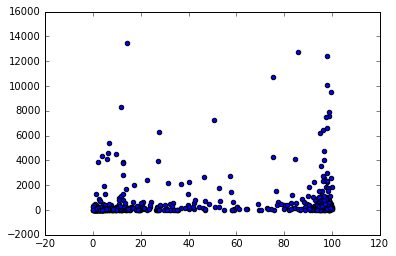

In [9]:
plt.scatter(suspensions_by_school["African American Pct"].mean(), suspensions_by_school["Count of Suspension Events"].sum())

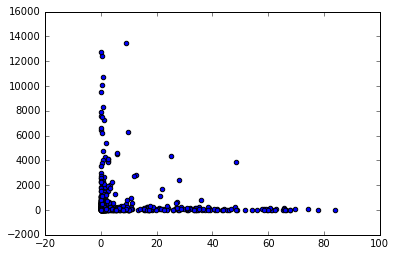

In [10]:
plt.scatter(suspensions_by_school["White Pct"].mean(), suspensions_by_school["Count of Suspension Events"].sum())

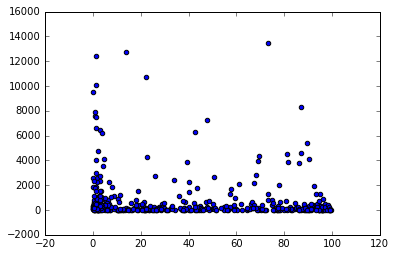

In [11]:
plt.scatter(suspensions_by_school["Hispanic Pct"].mean(), suspensions_by_school["Count of Suspension Events"].sum())

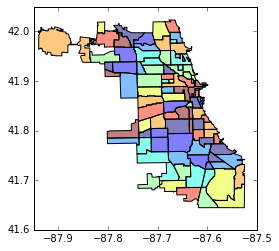

In [12]:
# Load school locations and neighborhood boundaries
chi_neighborhoods = GeoDataFrame.from_file("neighborhoods/chi_neighborhoods.shp")
cps_schools = GeoDataFrame.from_file("school_locations/cps_schools_1415.shp")
cps_schools["schoolid"] = cps_schools["schoolid"].astype(int)
cps_schools = cps_schools.to_crs(epsg=4326)
chi_neighborhoods = chi_neighborhoods.to_crs(epsg=4326)
chi_neighborhoods.plot()

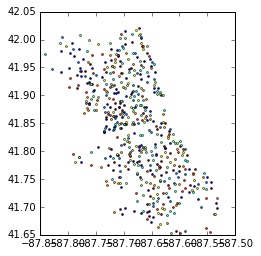

In [13]:
# Merge schools to locations
schools_by_suspension = suspension_race_merge.groupby("School ID")["Count of Suspension Events"].sum()
schools_by_suspension = schools_by_suspension.reset_index()

school_location_suspensions = pd.merge(cps_schools, schools_by_suspension, left_on="schoolid", right_on="School ID")
school_location_suspensions.plot()

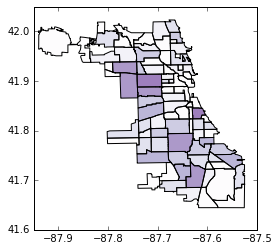

In [14]:
# Join suspensions directly to neighborhoods
neighborhood_suspensions = sjoin(chi_neighborhoods, school_location_suspensions)
neighborhood_suspension_counts = neighborhood_suspensions.groupby("pri_neigh")["Count of Suspension Events"].sum()
neighborhood_suspension_counts = neighborhood_suspension_counts.reset_index()
neigh_counts = neighborhood_suspension_counts[["pri_neigh","Count of Suspension Events"]]
neighb_suspensions = pd.merge(chi_neighborhoods, neigh_counts, on="pri_neigh")
neighb_suspensions.plot(column='Count of Suspension Events', scheme='fisher_jenks', k=7, cmap='Purples')

In [15]:
# Organize schools by suspensions and demographics
schools_by_suspension.sort_values(by="Count of Suspension Events",ascending=False, inplace=True)
school_suspensions_dem = pd.merge(schools_by_suspension, cps_race_data, on="School ID")
school_suspensions_dem = school_suspensions_dem[["Education Units",
                             "School ID",
                             "Count of Suspension Events",
                             "Total",
                             "White Pct",
                             "African American Pct",
                             "Native American/Alaskan Pct",
                             "Hispanic Pct",
                             "Asian Pct",
                             "Multi-Racial Pct"]]
school_suspensions_dem.describe()

,School ID,Count of Suspension Events,White Pct,African American Pct,Native American/Alaskan Pct,Hispanic Pct,Asian Pct,Multi-Racial Pct
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,606085.069943,679.793951,9.017391,48.342533,0.194140,37.697164,3.163894,1.081096
std,28625.349972,1666.766415,16.485525,41.942889,0.265546,36.519871,8.013859,1.553436
min,400018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,609854.000000,43.000000,0.200000,5.000000,0.000000,2.600000,0.000000,0.200000
50%,610036.000000,149.000000,1.000000,35.300000,0.100000,24.000000,0.200000,0.400000
75%,610209.000000,479.000000,8.800000,96.300000,0.300000,76.500000,2.300000,1.300000
max,610573.000000,13448.000000,84.000000,100.000000,1.800000,99.500000,83.800000,10.800000


In [16]:
# Create combined variable of Black and Hispanic means (more traditionally underrepresented/under-resourced)
school_suspensions_dem["Black/Hispanic Pct"] = school_suspensions_dem["African American Pct"] + school_suspensions_dem["Hispanic Pct"]
school_suspensions_dem.describe()

,School ID,Count of Suspension Events,White Pct,African American Pct,Native American/Alaskan Pct,Hispanic Pct,Asian Pct,Multi-Racial Pct,Black/Hispanic Pct
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,606085.069943,679.793951,9.017391,48.342533,0.194140,37.697164,3.163894,1.081096,86.039698
std,28625.349972,1666.766415,16.485525,41.942889,0.265546,36.519871,8.013859,1.553436,22.060992
min,400018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.600000
25%,609854.000000,43.000000,0.200000,5.000000,0.000000,2.600000,0.000000,0.200000,84.000000
50%,610036.000000,149.000000,1.000000,35.300000,0.100000,24.000000,0.200000,0.400000,97.600000
75%,610209.000000,479.000000,8.800000,96.300000,0.300000,76.500000,2.300000,1.300000,99.200000
max,610573.000000,13448.000000,84.000000,100.000000,1.800000,99.500000,83.800000,10.800000,100.000000


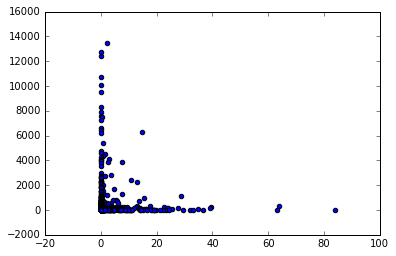

In [17]:
# Plotting schools by suspensions vs percentage Asian students
plt.scatter(school_suspensions_dem["Asian Pct"],school_suspensions_dem["Count of Suspension Events"])

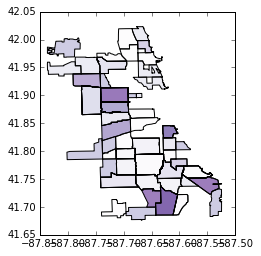

In [18]:
# Map schools in top 100 suspensions with neighborhoods
# Not significantly different
top_school_sus = school_suspensions_dem[:100]
top_school_locations_suspensions = pd.merge(cps_schools, top_school_sus, left_on="schoolid", right_on="School ID")
neighborhood_top_suspensions = sjoin(chi_neighborhoods, top_school_locations_suspensions)
neighborhood_top_suspensions.plot(column='Count of Suspension Events', scheme='fisher_jenks', k=5, cmap='Purples')

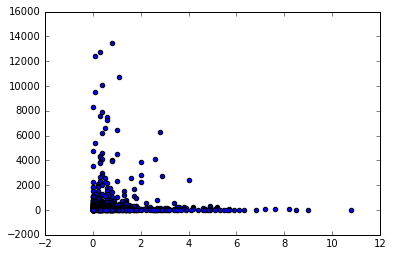

In [19]:
# Multi-Racial pct by suspensions
plt.scatter(school_suspensions_dem["Multi-Racial Pct"],school_suspensions_dem["Count of Suspension Events"])

In [20]:
top_school_sus.describe()

,School ID,Count of Suspension Events,White Pct,African American Pct,Native American/Alaskan Pct,Hispanic Pct,Asian Pct,Multi-Racial Pct,Black/Hispanic Pct
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,605771.280000,2907.000000,3.48800,65.199000,0.208000,28.599000,1.568000,0.655000,93.798000
std,29537.572082,2918.390853,8.04214,37.926778,0.285926,33.084048,4.236777,0.744186,11.228076
min,400018.000000,664.000000,0.00000,1.200000,0.000000,0.000000,0.000000,0.000000,41.600000
25%,609722.750000,935.500000,0.00000,23.900000,0.000000,1.750000,0.000000,0.200000,95.400000
50%,609790.500000,1780.500000,0.55000,91.350000,0.100000,7.150000,0.000000,0.400000,98.450000
75%,610244.250000,3908.250000,2.32500,97.500000,0.400000,57.300000,0.450000,0.800000,99.225000
max,610558.000000,13448.000000,48.40000,99.800000,1.800000,96.300000,28.700000,4.000000,100.000000


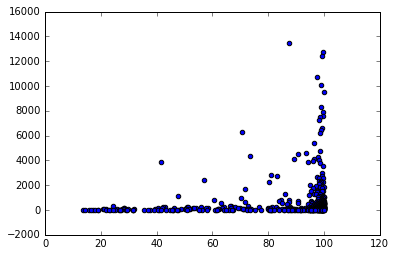

In [21]:
# Plotting combined Black/Hispanic Pct vs count suspensions
plt.scatter(school_suspensions_dem["Black/Hispanic Pct"],school_suspensions_dem["Count of Suspension Events"])

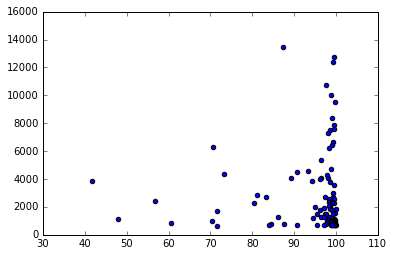

In [22]:
# Plotting combined column in top 100 schools
plt.scatter(top_school_sus["Black/Hispanic Pct"],top_school_sus["Count of Suspension Events"])

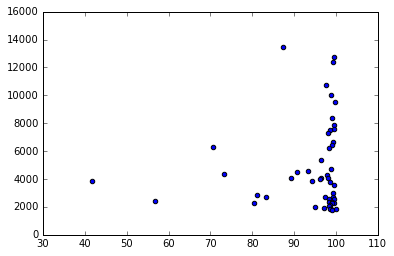

In [23]:
# Plotting combined column in top 50 schools
plt.scatter(top_school_sus[:50]["Black/Hispanic Pct"],top_school_sus[:50]["Count of Suspension Events"])

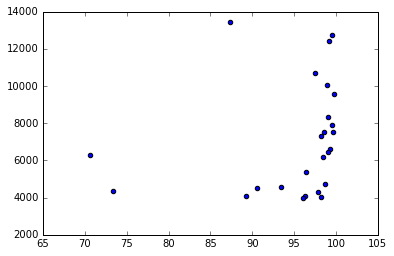

In [24]:
# Plotting combined column in top 25 schools
plt.scatter(top_school_sus[:25]["Black/Hispanic Pct"],top_school_sus[:25]["Count of Suspension Events"])

In [25]:
# Correlations
school_suspensions_dem.corr()

,School ID,Count of Suspension Events,White Pct,African American Pct,Native American/Alaskan Pct,Hispanic Pct,Asian Pct,Multi-Racial Pct,Black/Hispanic Pct
School ID,1.000000,-0.023015,0.056123,-0.135634,0.075450,0.117994,0.048683,0.019126,-0.062543
Count of Suspension Events,-0.023015,1.000000,-0.135899,0.153257,0.017214,-0.087630,-0.091262,-0.108278,0.146311
White Pct,0.056123,-0.135899,1.000000,-0.464314,0.179061,-0.029220,0.339904,0.692627,-0.931136
African American Pct,-0.135634,0.153257,-0.464314,1.000000,-0.448502,-0.850733,-0.301396,-0.298407,0.492916
Native American/Alaskan Pct,0.075450,0.017214,0.179061,-0.448502,1.000000,0.384269,0.146579,0.164511,-0.216582
Hispanic Pct,0.117994,-0.087630,-0.029220,-0.850733,0.384269,1.000000,-0.048267,-0.104058,0.037970
Asian Pct,0.048683,-0.091262,0.339904,-0.301396,0.146579,-0.048267,1.000000,0.388188,-0.652923
Multi-Racial Pct,0.019126,-0.108278,0.692627,-0.298407,0.164511,-0.104058,0.388188,1.000000,-0.739597
Black/Hispanic Pct,-0.062543,0.146311,-0.931136,0.492916,-0.216582,0.037970,-0.652923,-0.739597,1.000000
